In [213]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import datasets, preprocessing, decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [215]:
df= pd.read_csv('clean_df.csv')


## CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)

**Dendrogramme**

In [219]:
df.set_index('Zone',inplace=True)

In [220]:
from sklearn import preprocessing
#Valeur de nos variable dans X
X = df.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

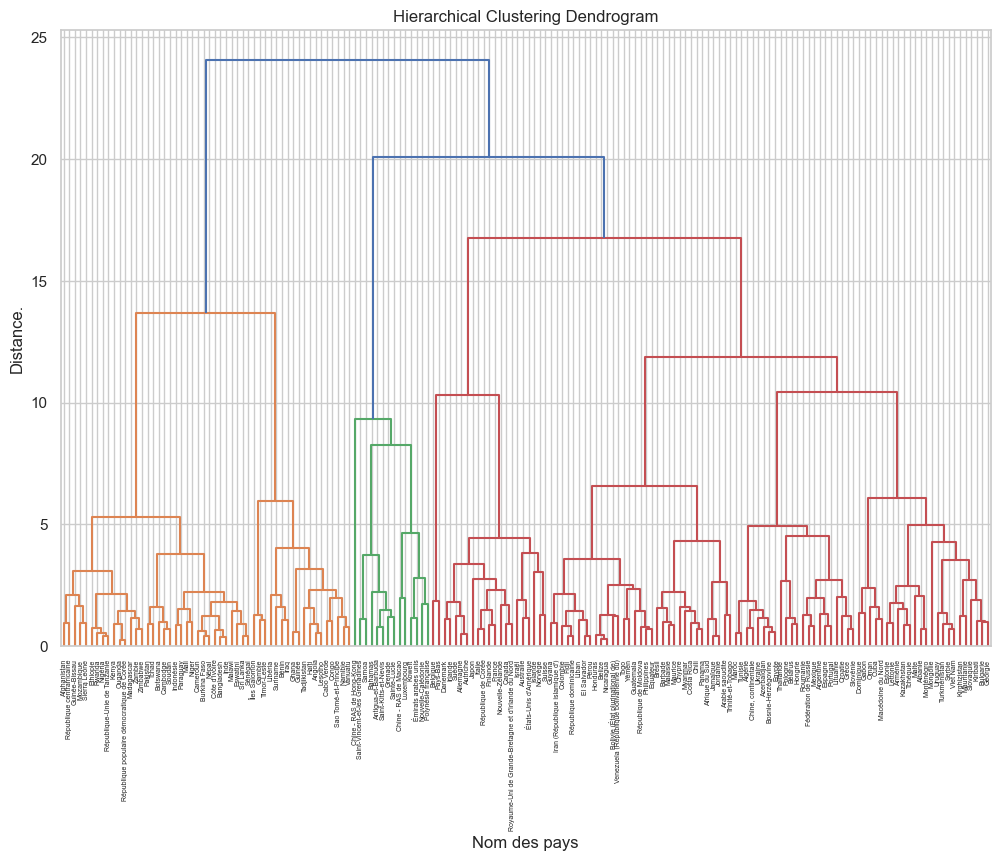

In [223]:
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method="ward", metric='euclidean')

#generer le dendrogramme 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z,labels= df.index, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Nom des pays")
plt.ylabel("Distance.")
plt.show()


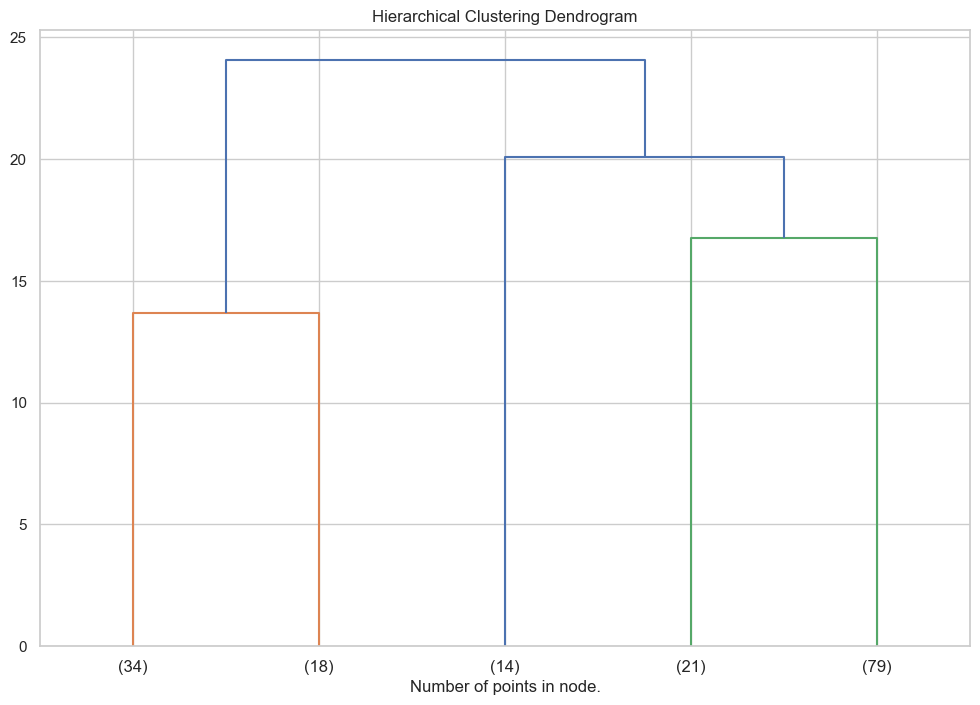

In [422]:
#garder 5 clusters
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z,p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node.")
plt.show()

In [420]:
groupecah=fcluster(Z, 5, criterion='maxclust')
#Affichage des pays selon leurs groupes
df2 = pd.DataFrame({'clusters cah': groupecah, 'Zone': df.index})
df2.head()

,clusters cah,Zone
0,1,Afghanistan
1,5,Afrique du Sud
2,5,Albanie
3,5,Algérie
4,4,Allemagne


In [226]:
#Jointure des cluester CAH sur notre dataframe de base
df3 = pd.merge(df, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388,1
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6429.574062,5
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4503.239709,5
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4027.655361,5
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45470.601480,4


## Présentation des clusters

In [228]:
cluster1cah= df3[df3['clusters cah']==1]
cluster1cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388,1
Bangladesh,2596.0,60.22,0.91,3.93,0.00,99.60,0.000000,1843.157934,1
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6502.074529,1
Burkina Faso,2720.0,76.08,0.80,7.01,0.00,100.00,0.000000,682.469934,1
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1539.162880,1
Cameroun,2652.0,69.49,0.60,9.46,0.00,98.78,0.000000,1469.544804,1
Côte d'Ivoire,2726.0,59.11,0.77,6.28,10.77,89.23,0.286445,1906.725675,1
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3548.275022,1
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,720.767703,1


In [229]:
cluster2cah= df3[df3['clusters cah']==2]
cluster2cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3788.156996,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1043.326186,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1900.951496,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1921.512871,2
Guinée,2793.0,61.78,0.74,12.38,74.00,26.00,3.066082,829.511079,2
Haïti,2163.0,49.91,0.82,27.34,90.82,9.18,8.103900,1419.446052,2
Iraq,2505.0,60.54,1.32,39.37,83.04,16.96,12.515718,4421.174539,2


In [230]:
cluster3cah= df3[df3['clusters cah']==3]
cluster3cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,16458.928678,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,29940.067088,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,69348.654167,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8848.328396,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33567.944601,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78845.712457,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32351.939121,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,20826.968399,3


In [231]:
cluster4cah= df3[df3['clusters cah']==4]
cluster4cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45470.601480,4
Australie,3307.0,108.01,2.88,23.19,1.37,108.37,0.650813,55283.803493,4
Autriche,3694.0,108.11,2.54,11.54,63.58,85.55,12.471795,46977.963467,4
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44598.085232,4
Canada,3492.0,101.33,2.03,27.01,12.70,98.88,4.954795,44236.840050,4
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,58783.889927,4
Finlande,3337.0,117.77,2.46,10.62,14.41,116.22,2.903089,46433.777435,4
France,3556.0,112.08,2.70,12.83,32.17,111.25,7.803523,40459.070144,4
Irlande,3714.0,105.81,2.26,19.13,77.34,85.94,20.827728,56845.982495,4


In [232]:
cluster5cah= df3[df3['clusters cah']==5]
cluster5cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6429.574062,5
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4503.239709,5
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4027.655361,5
Arabie saoudite,3194.0,87.51,2.49,41.85,50.31,42.93,21.811912,23574.917554,5
Argentine,3239.0,102.66,3.09,20.60,0.41,110.14,0.182078,14161.574384,5
...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),2247.0,56.30,1.74,28.44,3.99,95.85,0.850268,7676.686180,5
Viet Nam,2938.0,90.03,1.88,10.90,24.13,76.12,3.076089,2777.521568,5
Yémen,2062.0,53.24,1.29,28.36,31.71,68.29,2.802246,552.732233,5


<Axes: xlabel='clusters cah', ylabel='Ratio protéine volaille/protéines animal'>

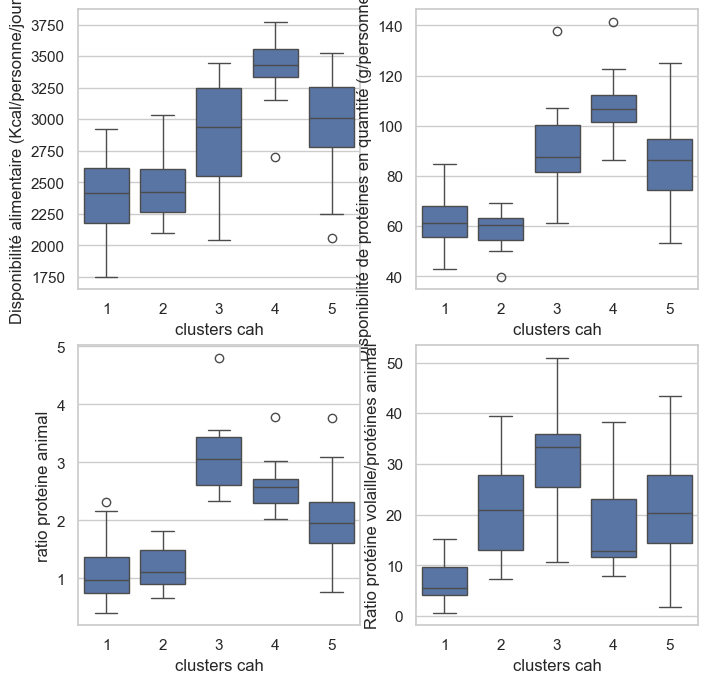

In [233]:
#Comparaison a l'aide de boite a moustache
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='clusters cah', y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=df3, x='clusters cah', y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=df3, x='clusters cah', y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=df3, x='clusters cah', y='Ratio protéine volaille/protéines animal')

<Axes: xlabel='clusters cah', ylabel='importation volaille/hab(kg/hab)'>

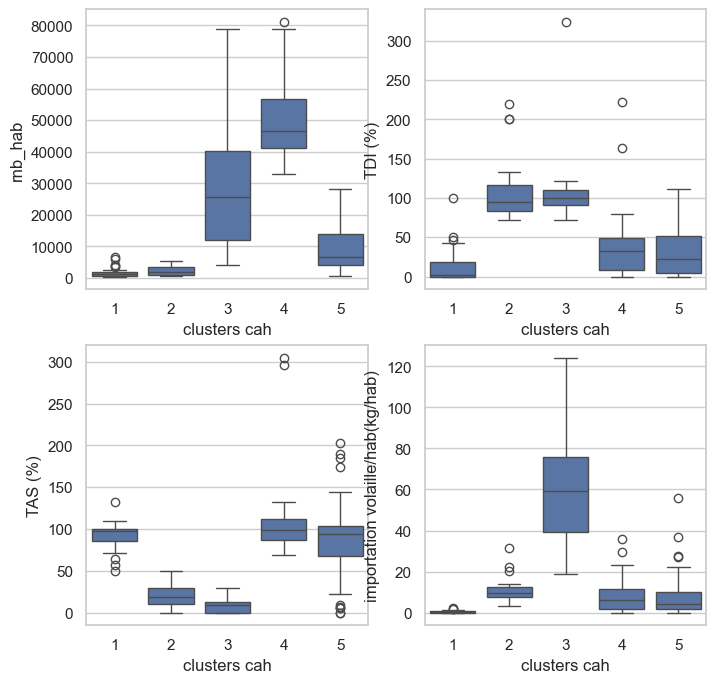

In [235]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='clusters cah', y='rnb_hab')
plt.subplot(222)
sns.boxplot(data=df3, x='clusters cah', y='TDI (%)')
plt.subplot(223)
sns.boxplot(data=df3, x='clusters cah', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df3, x='clusters cah', y='importation volaille/hab(kg/hab)')

In [237]:
DFgroupedcah=df3.groupby(['clusters cah']).mean().reset_index()
DFgroupedcah

,clusters cah,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,1,2400.852941,62.085882,1.086765,6.879706,12.824706,91.541765,0.360624,1639.472761
1,2,2449.555556,58.366667,1.184444,21.708333,111.407778,20.870556,11.461053,2324.334725
2,3,2868.000000,91.621429,3.099286,31.310000,114.352857,9.005000,60.452130,30350.610752
3,4,3435.476190,107.179524,2.583333,16.808095,44.066190,118.254286,9.243713,50640.458457
4,5,2988.835443,85.550759,1.993291,20.978987,32.889114,86.026835,7.341982,9045.707466


In [241]:
df3[df3['clusters cah']==2]

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3788.156996,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1043.326186,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1900.951496,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1921.512871,2
Guinée,2793.0,61.78,0.74,12.38,74.00,26.00,3.066082,829.511079,2
Haïti,2163.0,49.91,0.82,27.34,90.82,9.18,8.103900,1419.446052,2
Iraq,2505.0,60.54,1.32,39.37,83.04,16.96,12.515718,4421.174539,2


In [246]:
df3[df3['clusters cah']==3]


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,16458.928678,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,29940.067088,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,69348.654167,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8848.328396,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33567.944601,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78845.712457,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32351.939121,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,20826.968399,3


## METHODE K-MEANS

Recherche du nombre de cluster


Methode du Coude

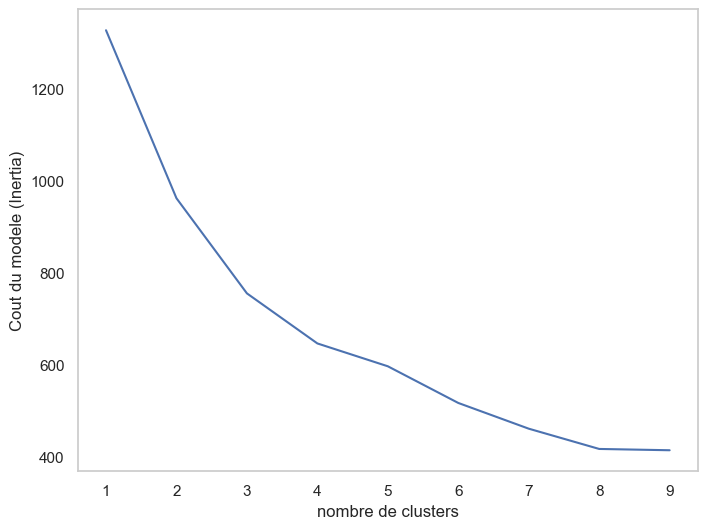

In [400]:
import warnings
warnings.filterwarnings(
    "ignore",
    message="KMeans is known to have a memory leak",
    category=UserWarning
)
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

## Methode de silhouette

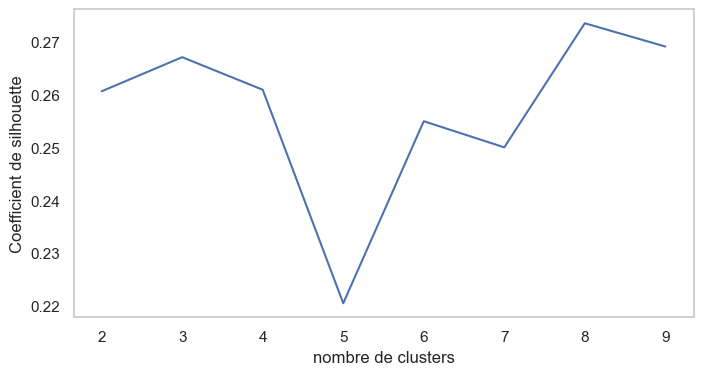

[0.2606199280723543,
 0.2670638312373351,
 0.2609054221635529,
 0.22051560874205342,
 0.2549515777324185,
 0.25000918897837077,
 0.2734852241519069,
 0.26908168804537635]

In [402]:
import warnings
warnings.filterwarnings("ignore",
    message="KMeans is known to have a memory leak", category=UserWarning)
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_scaled)
    tab_silhouette.append(silhouette_score(X_scaled,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

## Analyse des clusters

In [408]:
# Clustering par K-means
km = KMeans(n_clusters=5)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [260]:
df_c1 = pd.DataFrame({'cluster': clusters, 'Zone': df.index})
df_c1

,cluster,Zone
0,1,Afghanistan
1,0,Afrique du Sud
2,0,Albanie
3,0,Algérie
4,4,Allemagne
...,...,...
161,3,Émirats arabes unis
162,1,Équateur
163,4,États-Unis d'Amérique
164,1,Éthiopie


In [263]:
# Reset de l'index pour pouvoir merge
df.reset_index(inplace=True)

In [265]:
#Notre df + les clusters pour pouvoir etudier nos groupes
df_c = pd.merge(df, df_c1, on='Zone')
df_c.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
0,Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388,1
1,Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6429.574062,0
2,Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4503.239709,0
3,Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4027.655361,0
4,Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45470.601480,4


In [267]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Zone                                                        166 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)_x            166 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)_x  166 non-null    float64
 3   ratio proteine animal                                       166 non-null    float64
 4   Ratio protéine volaille/protéines animal                    166 non-null    float64
 5   TDI (%)                                                     166 non-null    float64
 6   TAS (%)                                                     166 non-null    float64
 7   importation volaille/hab(kg/hab)                            166 non-null    float64
 8   

In [269]:
df_c_grouped = pd.pivot_table(df_c, index ='cluster', values= "Zone", aggfunc= len)
df_c_grouped

,Zone
cluster,
0,55
1,42
2,28
3,12
4,29


In [271]:
df_c.set_index('Zone',inplace=True)

## Presentation des 5 clusters

In [274]:
Kcluster1= df_c[df_c['cluster']==0]
Kcluster1

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6429.574062,0
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4503.239709,0
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4027.655361,0
Arabie saoudite,3194.0,87.51,2.49,41.85,50.31,42.93,21.811912,23574.917554,0
Argentine,3239.0,102.66,3.09,20.60,0.41,110.14,0.182078,14161.574384,0
Azerbaïdjan,3102.0,92.30,1.39,14.79,20.93,80.62,2.742420,3944.583977,0
Barbade,2896.0,88.74,3.09,29.66,11.76,88.24,6.987339,18811.602914,0
Belize,2694.0,67.11,1.62,31.65,0.00,105.26,0.000000,5774.905142,0
Bolivie (État plurinational de),2354.0,68.40,2.04,36.76,0.23,124.24,0.089343,3228.278221,0


In [276]:
Kcluster2= df_c[df_c['cluster']==1]
Kcluster2

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388,1
Bangladesh,2596.0,60.22,0.91,3.93,0.00,99.60,0.000000,1843.157934,1
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6502.074529,1
Burkina Faso,2720.0,76.08,0.80,7.01,0.00,100.00,0.000000,682.469934,1
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1539.162880,1
Cameroun,2652.0,69.49,0.60,9.46,0.00,98.78,0.000000,1469.544804,1
Côte d'Ivoire,2726.0,59.11,0.77,6.28,10.77,89.23,0.286445,1906.725675,1
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3548.275022,1
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,720.767703,1


In [278]:
Kcluster3= df_c[df_c['cluster']==2]
Kcluster3

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3788.156996,2
Arménie,3072.0,97.33,1.62,12.17,74.47,23.40,11.885394,4094.332429,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1043.326186,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1900.951496,2
Cuba,3409.0,88.40,1.41,21.83,91.23,8.48,27.515038,8490.260654,2
Gabon,2640.0,79.31,2.08,27.17,97.44,5.13,36.807029,6484.249382,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1921.512871,2


In [280]:
Kcluster4 = df_c[df_c['cluster']== 3]
Kcluster4

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,16458.928678,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,29940.067088,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310,3
Dominique,2945.0,78.96,1.60,26.50,100.00,0.00,55.976938,7088.602256,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8848.328396,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32351.939121,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,20826.968399,3
Saint-Kitts-et-Nevis,2517.0,76.86,3.45,38.59,100.00,0.00,76.856566,21499.830560,3
Saint-Vincent-et-les Grenadines,2962.0,89.17,2.74,50.90,112.50,0.00,81.947062,7942.655564,3


In [282]:
Kcluster5= df_c[df_c['cluster']==4]
Kcluster5

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45470.601480,4
Australie,3307.0,108.01,2.88,23.19,1.37,108.37,0.650813,55283.803493,4
Autriche,3694.0,108.11,2.54,11.54,63.58,85.55,12.471795,46977.963467,4
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44598.085232,4
Canada,3492.0,101.33,2.03,27.01,12.70,98.88,4.954795,44236.840050,4
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,69348.654167,4
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,58783.889927,4
Espagne,3270.0,106.99,2.59,18.75,13.69,101.20,4.394669,28030.261775,4
Estonie,3241.0,107.29,2.18,11.80,72.41,68.97,15.916446,20368.439956,4


## Distribution des variables par groupes à l'aide de boite à moustache

<Axes: xlabel='cluster', ylabel='Ratio protéine volaille/protéines animal'>

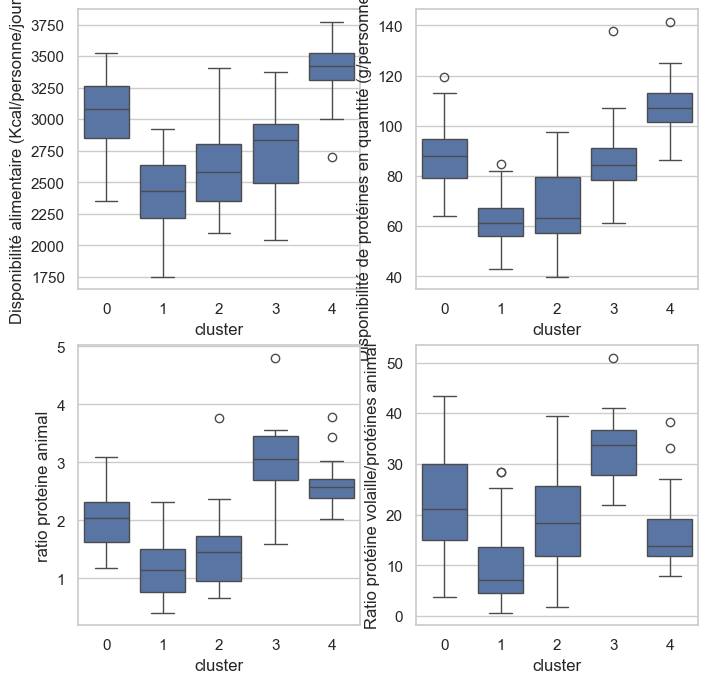

In [285]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_c, x='cluster', y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=df_c, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=df_c, x='cluster', y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=df_c, x='cluster', y='Ratio protéine volaille/protéines animal')

<Axes: xlabel='cluster', ylabel='importation volaille/hab(kg/hab)'>

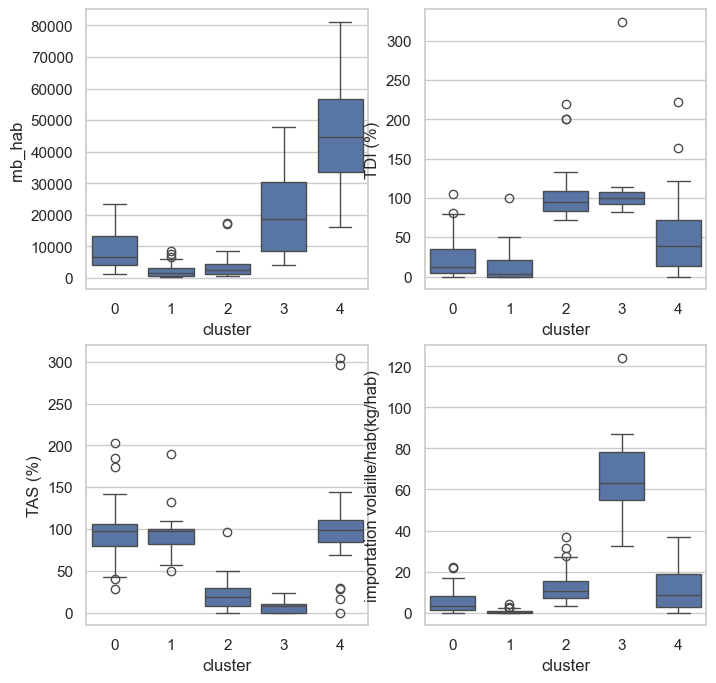

In [286]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_c, x='cluster', y='rnb_hab')
plt.subplot(222)
sns.boxplot(data=df_c, x='cluster', y='TDI (%)')
plt.subplot(223)
sns.boxplot(data=df_c, x='cluster', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df_c, x='cluster', y='importation volaille/hab(kg/hab)')

In [287]:
DFgrouped=df_c.groupby(['cluster']).mean().reset_index()
DFgrouped

,cluster,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,0,3045.690909,87.367091,2.016909,22.471091,21.939636,97.026545,5.203711,8878.470277
1,1,2421.785714,61.857381,1.171190,9.720000,13.333810,92.707143,0.624667,2192.453248
2,2,2599.357143,66.707143,1.476071,18.990357,105.130000,21.440357,13.066571,3967.320993
3,3,2776.583333,87.984167,3.045000,33.629167,117.283333,6.720833,67.750317,20852.903463
4,4,3407.137931,107.816897,2.599655,17.030345,49.938276,102.844138,11.990229,46856.221928


In [288]:
Kcluster4

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,16458.928678,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,29940.067088,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310,3
Dominique,2945.0,78.96,1.60,26.50,100.00,0.00,55.976938,7088.602256,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8848.328396,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32351.939121,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,20826.968399,3
Saint-Kitts-et-Nevis,2517.0,76.86,3.45,38.59,100.00,0.00,76.856566,21499.830560,3
Saint-Vincent-et-les Grenadines,2962.0,89.17,2.74,50.90,112.50,0.00,81.947062,7942.655564,3


In [414]:
Kcluster3

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3788.156996,2
Arménie,3072.0,97.33,1.62,12.17,74.47,23.40,11.885394,4094.332429,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1043.326186,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1900.951496,2
Cuba,3409.0,88.40,1.41,21.83,91.23,8.48,27.515038,8490.260654,2
Gabon,2640.0,79.31,2.08,27.17,97.44,5.13,36.807029,6484.249382,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1921.512871,2


In [289]:
Kcluster2


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,539.263388,1
Bangladesh,2596.0,60.22,0.91,3.93,0.00,99.60,0.000000,1843.157934,1
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6502.074529,1
Burkina Faso,2720.0,76.08,0.80,7.01,0.00,100.00,0.000000,682.469934,1
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1539.162880,1
Cameroun,2652.0,69.49,0.60,9.46,0.00,98.78,0.000000,1469.544804,1
Côte d'Ivoire,2726.0,59.11,0.77,6.28,10.77,89.23,0.286445,1906.725675,1
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3548.275022,1
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,720.767703,1


In [290]:
km.cluster_centers_


array([[ 0.41620512,  0.31015038,  0.16411622,  0.36163315, -0.45617231,
         0.39494094, -0.31269562, -0.27242971],
       [-0.95446056, -0.94134578, -0.91117467, -0.80364684, -0.62224716,
         0.30679911, -0.55642463, -0.6381676 ],
       [-0.56435151, -0.7034184 , -0.52353307,  0.04354041,  1.14923158,
        -1.14747255,  0.1058212 , -0.54107895],
       [-0.17500092,  0.34042387,  1.47128479,  1.38133275,  1.38376605,
        -1.44783949,  3.01647573,  0.38259464],
       [ 1.21027293,  1.31340967,  0.90505008, -0.13557863,  0.08414417,
         0.51365486,  0.04853073,  1.8050258 ]])

In [291]:
table_centro_k = pd.DataFrame(km.cluster_centers_, columns = ['Disponibilité alimentaire (Kcal/personne/jour)_x', 'Disponibilité de protéines en quantité (g/personne/jour)_x', 'ratio proteine animal', 'Ratio protéine volaille/protéines animal', 'TDI (%)','TAS (%)','importation volaille/hab(kg/hab)','rnb_hab'] )
table_centro_k

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,0.416205,0.310150,0.164116,0.361633,-0.456172,0.394941,-0.312696,-0.272430
1,-0.954461,-0.941346,-0.911175,-0.803647,-0.622247,0.306799,-0.556425,-0.638168
2,-0.564352,-0.703418,-0.523533,0.043540,1.149232,-1.147473,0.105821,-0.541079
3,-0.175001,0.340424,1.471285,1.381333,1.383766,-1.447839,3.016476,0.382595
4,1.210273,1.313410,0.905050,-0.135579,0.084144,0.513655,0.048531,1.805026


## Heatmap des centroide du Kmeans

<Axes: >

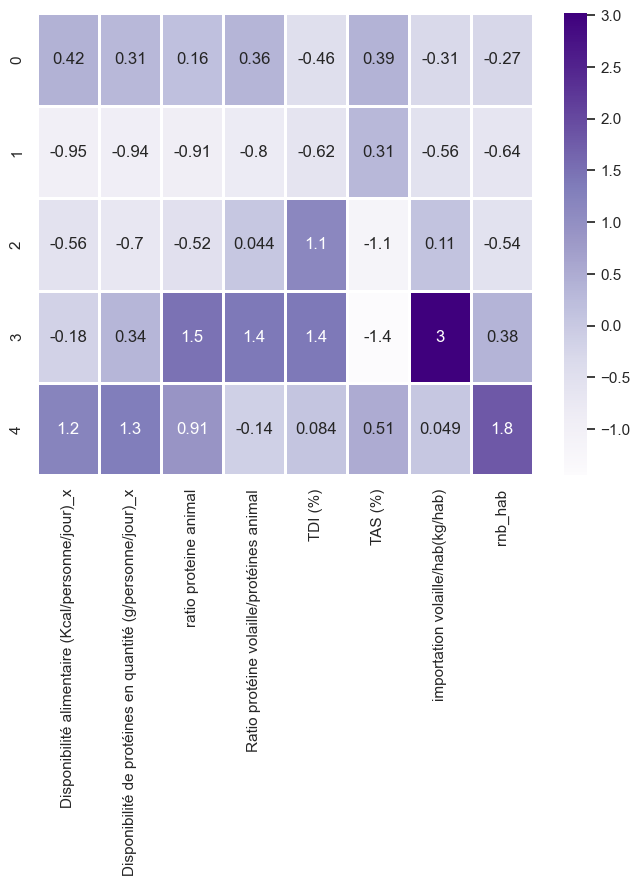

In [300]:
fig, ax = plt.subplots(figsize = (8, 6)) 
cols = table_centro_k.index
idx = table_centro_k.columns

sns.heatmap(table_centro_k, cmap ='Purples', linewidths = 0.80, annot = True)


## Comparaison des deux méthode de clustering

In [303]:
dfcross = pd.merge(df3, df_c  , on= "Zone")
pd.crosstab(dfcross['cluster'],dfcross['clusters cah'])

clusters cah,1,2,3,4,5
cluster,,,,,
0,0,0,0,0,55
1,34,0,0,0,8
2,0,18,0,0,10
3,0,0,11,0,1
4,0,0,3,21,5


In [305]:
Cah_clus1 = df2[df2['clusters cah']== 1]
Cah_clus2 = df2[df2['clusters cah']== 2]
Cah_clus3 = df2[df2['clusters cah']== 3]
Cah_clus4 = df2[df2['clusters cah']== 4]
Cah_clus5 = df2[df2['clusters cah']== 5]

In [307]:
Kmeans_clus1 = df_c1[df_c1['cluster']== 0]
Kmeans_clus2 = df_c1[df_c1['cluster']== 1]
Kmeans_clus3 = df_c1[df_c1['cluster']== 2]
Kmeans_clus4 = df_c1[df_c1['cluster']== 3]
Kmeans_clus5 = df_c1[df_c1['cluster']== 4]

In [309]:
notregroupe1=pd.concat([Cah_clus3, Kmeans_clus4],axis=1)
notregroupe1

,clusters cah,Zone,cluster,Zone
6,3.0,Antigua-et-Barbuda,3.0,Antigua-et-Barbuda
13,3.0,Bahamas,3.0,Bahamas
31,3.0,Chine - RAS de Hong-Kong,3.0,Chine - RAS de Hong-Kong
32,3.0,Chine - RAS de Macao,NaN,NaN
54,3.0,Grenade,3.0,Grenade
79,3.0,Koweït,NaN,NaN
85,3.0,Luxembourg,NaN,NaN
105,3.0,Nouvelle-Calédonie,3.0,Nouvelle-Calédonie
116,3.0,Polynésie française,3.0,Polynésie française
128,3.0,Saint-Kitts-et-Nevis,3.0,Saint-Kitts-et-Nevis


In [311]:
notregroupe2=pd.concat([Cah_clus2, Kmeans_clus2],axis=1)
notregroupe2

,clusters cah,Zone,cluster,Zone
5,2.0,Angola,NaN,NaN
25,2.0,Bénin,NaN,NaN
26,2.0,Cabo Verde,NaN,NaN
36,2.0,Congo,NaN,NaN
52,2.0,Gambie,NaN,NaN
53,2.0,Ghana,NaN,NaN
57,2.0,Guinée,NaN,NaN
61,2.0,Haïti,NaN,NaN
67,2.0,Iraq,NaN,NaN
80,2.0,Lesotho,NaN,NaN


## ANALYSE EN COMPOSANTES PRINCIPALES (ACP)

**cette méthode vise à réduire le nombre de variables appliquées à des individus, pour simplifier les observations tout en conservant un maximum d’informations.**

## Eboulis des valeurs propres

[0.40467633 0.27346396 0.12125854 0.06319475 0.05908333 0.04407571
 0.02670058 0.00754679]
1.0


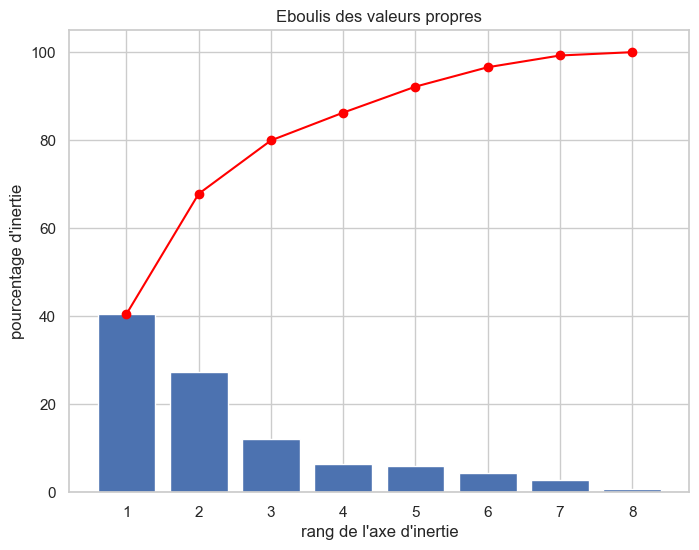

In [316]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
#Afficher la figure
figure1 = plt.figure(figsize=(8,6))
display_scree_plot(pca)
plt.show()

**Observation eboulis :**
Nous garderons 5 axes 

Axe 1 : 40% de l'inertie totale
Axe 2 : 27% de l'inertie totale
Axe 3 : 12% de l'inertie totale
Axe 4 : 06% de l'inertie totale
Axe 5 : 06% de l'inertie totale
Pour un total de 92% de l'information totale

## Correlation de nos variable sur les composantes principales

In [320]:
df.set_index('Zone',inplace=True)

In [322]:
# création de la matrice de corrélation
t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5','F6','F7','F8'],columns=df.columns)
df_corr_comp.head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
F1,0.427347,0.484097,0.473594,0.170763,0.195546,-0.002068,0.311597,0.440724
F2,-0.311219,-0.242477,0.058118,0.264398,0.472514,-0.541677,0.481684,-0.149534
F3,-0.021650,0.074796,-0.099562,-0.850215,0.476500,-0.080414,-0.003898,0.166208
F4,-0.258288,-0.234490,0.137741,0.053132,0.291253,0.822776,0.307742,-0.003528
F5,0.539270,0.217623,-0.479595,0.125578,0.322406,0.140311,0.125113,-0.526081


Premier axe F1 :
Il représente nos dispo (0.42,0.48), notre ratio de proteine animal(0.47) ainsi que le rnb_hab (0.44)

Deuxieme axe F2 :
Il représente notre TDI(0.47), TAS(-0.54) ainsi que notre importation de vollaile/hab(0.48)

Troisième axe F3 :
Il représente notre Ratio de proteine de vollaile/ les proteine animal(-0.85) et TDI(0.47)

Quatrième axe F4 :
Il représente notre TAS (0.81)

Cinquième axe F5 :
Il représente notre dispo alimentaire(0.51), le ratio de proteine animal (-0.46) ainsi que le rnb_hab(-0.53)

## Qualité de représentation des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale

In [327]:
di = np.sum(X_scaled**2,axis=1) #pourcentage d'inertie

df_ctr_ind = pd.DataFrame({'Zone':df.index,'d_i':di})
df_ctr_ind


,Zone,d_i
0,Afghanistan,9.047714
1,Afrique du Sud,4.837389
2,Albanie,7.456257
3,Algérie,4.863510
4,Allemagne,7.474794
...,...,...
161,Émirats arabes unis,14.534770
162,Équateur,2.458635
163,États-Unis d'Amérique,16.342302
164,Éthiopie,9.045603


In [329]:
df_ctr_ind.sort_values(by= "d_i", ascending = False)

,Zone,d_i
31,Chine - RAS de Hong-Kong,93.277902
16,Belgique,42.906853
113,Pays-Bas,33.490866
129,Saint-Vincent-et-les Grenadines,28.660099
69,Islande,28.519050
...,...,...
156,Viet Nam,1.431991
37,Costa Rica,1.329763
78,Kiribati,1.114708
34,Chypre,1.011468


In [331]:
coord = pca.fit_transform(X_scaled)
#qualité de représentation des individus par dimensions- COS2
cos2 = coord**2
p=5 # nombre de variables
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]})
df_ctr_12

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5
0,Afghanistan,0.754565,0.059533,0.124731,0.000065,0.054296
1,Afrique du Sud,0.044191,0.013194,0.864337,0.000750,0.015424
2,Albanie,0.208166,0.000232,0.173653,0.260876,0.223305
3,Algérie,0.041052,0.552955,0.036187,0.089031,0.207321
4,Allemagne,0.650321,0.197590,0.072753,0.026218,0.005194
...,...,...,...,...,...,...
161,Émirats arabes unis,0.723241,0.192352,0.004874,0.025973,0.003599
162,Équateur,0.491145,0.086221,0.215842,0.032419,0.129359
163,États-Unis d'Amérique,0.555778,0.314497,0.034416,0.011215,0.017756
164,Éthiopie,0.742185,0.060440,0.113270,0.002716,0.001154


Nous avons la qualité de representation des individus (ici des pays) sur les 5 dimensions de l'ACP

## Qualité de représentation des variables

Nous avons une idée des individus que nous allons pouvoir étudier.

La prochaine étape est de caractériser nos composantes principales. Pour rappel, chaque composante est composé d'une combinaison linéaire des variables corrélés de notre jeu de données d'entré. Chaque composante est décorrélé

In [336]:
#Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ .components_de l'objet ACP
print(pca.components_)

[[ 0.42734735  0.4840968   0.47359437  0.17076348  0.19554606 -0.00206827
   0.31159734  0.44072361]
 [-0.31121891 -0.24247668  0.05811755  0.26439832  0.47251391 -0.54167715
   0.48168437 -0.14953384]
 [-0.02165008  0.07479571 -0.09956224 -0.85021455  0.47650045 -0.08041363
  -0.00389804  0.16620839]
 [-0.25828809 -0.23449014  0.13774119  0.05313164  0.29125349  0.82277584
   0.30774163 -0.0035282 ]
 [ 0.53926983  0.21762254 -0.47959457  0.12557804  0.32240589  0.14031131
   0.1251126  -0.52608145]
 [ 0.1068725  -0.26604372 -0.53974107  0.3004894   0.23690343  0.01293133
  -0.17441507  0.67042795]
 [ 0.00620035 -0.0390491   0.38259045  0.20654849  0.50837933  0.00309563
  -0.72280656 -0.16879138]
 [ 0.59250607 -0.72568014  0.27520652 -0.16284842 -0.08995961 -0.05736806
   0.08743027 -0.03223019]]


In [338]:
#obtenir les variances ou valeurs propres
n = df.shape[0]
VP = (n-1)/n*pca.explained_variance_
VP

array([3.23741065, 2.18771172, 0.9700683 , 0.50555801, 0.47266664,
       0.35260565, 0.21360468, 0.06037436])

In [340]:
#variance expliquée
VP = pca.explained_variance_
#racine carrée des valeurs propres
R2VP = np.sqrt(VP)

In [342]:
#corrélation des variables avec les axes
k = 8

corvar = numpy.zeros((k, p))

for k in range(p):
    corvar[:,k] = pca.components_[k,:] * R2VP[k]
    
    

    #afficher la matrice des corrélations variables x facteurs
print(corvar.T)

[[ 0.77124433  0.87366146  0.85470746  0.30818107  0.35290681 -0.00373265
   0.56234743  0.7953848 ]
 [-0.46171405 -0.35973036  0.08622127  0.39225258  0.70100597 -0.80361426
   0.71461096 -0.22184345]
 [-0.02138812  0.07389072 -0.09835759 -0.83992743  0.47073506 -0.07944067
  -0.00385088  0.16419736]
 [-0.18420523 -0.16723307  0.0982339   0.03789229  0.2077154   0.58678513
   0.21947438 -0.00251624]
 [ 0.37187388  0.15006984 -0.33072255  0.08659708  0.22232716  0.09675697
   0.08627612 -0.36277933]]


In [344]:
Matrice_de_correlation = pd.DataFrame({'variables':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3]})
Matrice_de_correlation

,variables,COR_1,COR_2,COR_3,COR_4
0,Disponibilité alimentaire (Kcal/personne/jour)_x,0.771244,-0.461714,-0.021388,-0.184205
1,Disponibilité de protéines en quantité (g/pers...,0.873661,-0.359730,0.073891,-0.167233
2,ratio proteine animal,0.854707,0.086221,-0.098358,0.098234
3,Ratio protéine volaille/protéines animal,0.308181,0.392253,-0.839927,0.037892
4,TDI (%),0.352907,0.701006,0.470735,0.207715
5,TAS (%),-0.003733,-0.803614,-0.079441,0.586785
6,importation volaille/hab(kg/hab),0.562347,0.714611,-0.003851,0.219474
7,rnb_hab,0.795385,-0.221843,0.164197,-0.002516


In [345]:
#on affiche la qualité de représentation de nos variables sur les 4 premiers axes
cos2var = corvar**2
DF_COS2 = pd.DataFrame({'variables':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3]})
DF_COS2

,variables,COS2_1,COS2_2,COS2_3,COS2_4
0,Disponibilité alimentaire (Kcal/personne/jour)_x,0.594818,0.213180,0.000457,0.033932
1,Disponibilité de protéines en quantité (g/pers...,0.763284,0.129406,0.005460,0.027967
2,ratio proteine animal,0.730525,0.007434,0.009674,0.009650
3,Ratio protéine volaille/protéines animal,0.094976,0.153862,0.705478,0.001436
4,TDI (%),0.124543,0.491409,0.221591,0.043146
5,TAS (%),0.000014,0.645796,0.006311,0.344317
6,importation volaille/hab(kg/hab),0.316235,0.510669,0.000015,0.048169
7,rnb_hab,0.632637,0.049215,0.026961,0.000006


## Cercle des correlations

In [347]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', ha='left', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

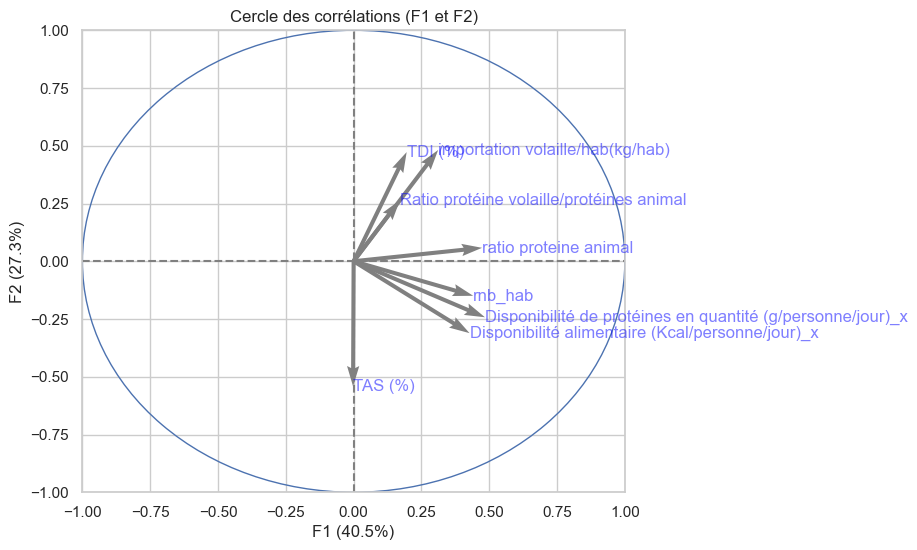

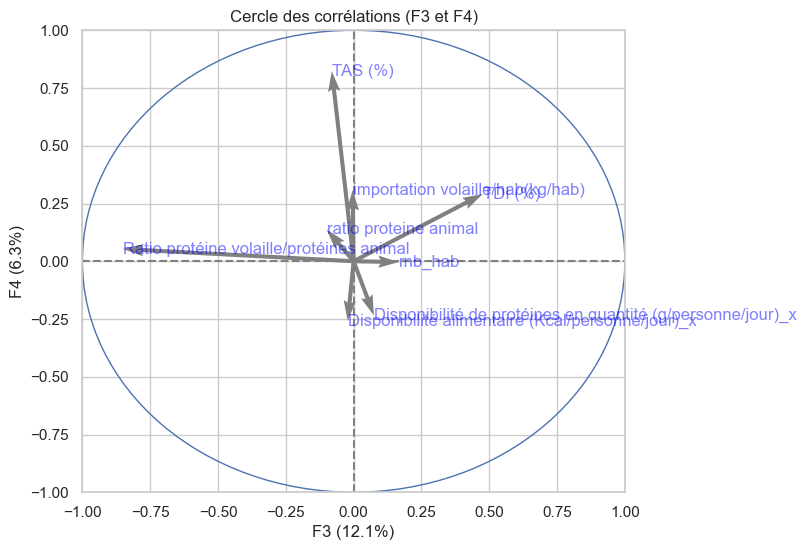

In [351]:
# choix du nombre de composantes à calculer
n_comp = 5
# selection des colonnes à prendre en compte dans l'ACP
features = df.columns
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features) )
plt.show()

## Projection des individus

In [354]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,7))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

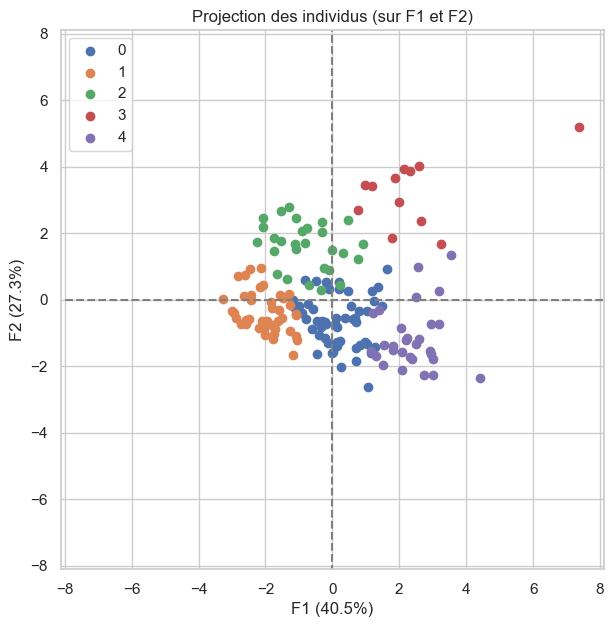

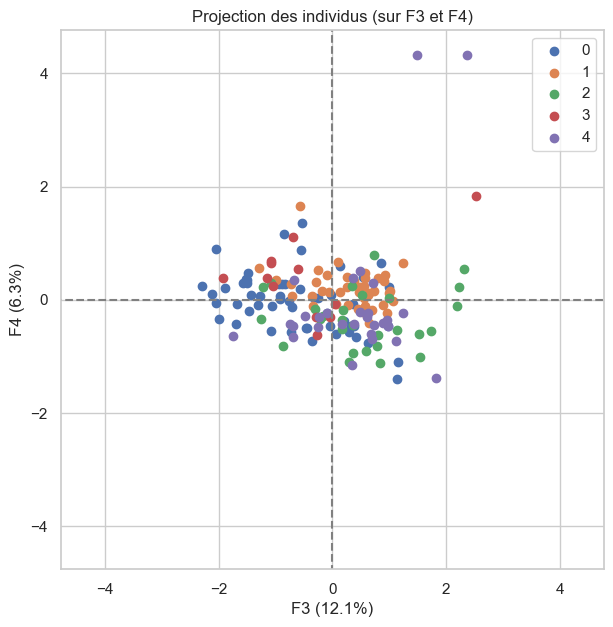

<Figure size 1000x1000 with 0 Axes>

In [356]:
# selection des intitulés des groupes
names = df_c["cluster"]  
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = names, alpha = 1)
figure3 = plt.figure(figsize=(10,10))
plt.show()

## Observation
Sur le graphique n°1 :

le groupe n°3 ce détache :
TDI élevé, TAS faible, bonne disponibilité global et rnb élevé

le groupe n°1 ce détache :
TDI élevé, TAS faible, mauvaise disponibilité global et rnb faible

## Analyst Pestel
Pour terminer notre analyse, nous allons procéder à notre pestel pour rajouter quelque critère de selection :

Stabilité politique
Leur population

In [360]:
stab_2017 = pd.read_csv(r"C:\Users\aylin\Downloads\DAN-P11-data\DAN-P11-data\Population_2000_2018.csv")
pop=pd.read_csv('pop_2017.csv')

In [362]:
notregroupe1

,clusters cah,Zone,cluster,Zone
6,3.0,Antigua-et-Barbuda,3.0,Antigua-et-Barbuda
13,3.0,Bahamas,3.0,Bahamas
31,3.0,Chine - RAS de Hong-Kong,3.0,Chine - RAS de Hong-Kong
32,3.0,Chine - RAS de Macao,NaN,NaN
54,3.0,Grenade,3.0,Grenade
79,3.0,Koweït,NaN,NaN
85,3.0,Luxembourg,NaN,NaN
105,3.0,Nouvelle-Calédonie,3.0,Nouvelle-Calédonie
116,3.0,Polynésie française,3.0,Polynésie française
128,3.0,Saint-Kitts-et-Nevis,3.0,Saint-Kitts-et-Nevis


In [364]:
notregroupe2

,clusters cah,Zone,cluster,Zone
5,2.0,Angola,NaN,NaN
25,2.0,Bénin,NaN,NaN
26,2.0,Cabo Verde,NaN,NaN
36,2.0,Congo,NaN,NaN
52,2.0,Gambie,NaN,NaN
53,2.0,Ghana,NaN,NaN
57,2.0,Guinée,NaN,NaN
61,2.0,Haïti,NaN,NaN
67,2.0,Iraq,NaN,NaN
80,2.0,Lesotho,NaN,NaN


## Stabilité politique

In [367]:
stab_2017


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [369]:
Zone1=['Antigua-et-Barbuda','Bahamas','Chine - RAS de Hong-Kong','Chine - RAS de Macao','Grenade','Koweït','Luxembourg','Saint-Kitts-et-Nevis','Saint-Vincent-et-les Grenadines','Sainte-Lucie','Samoa','Émirats arabes unis','Dominique']
stab = pd.pivot_table(stab_2017, index ='Zone', values= "Valeur", aggfunc= 'sum')
stab = stab.loc[Zone1].sort_values('Valeur', ascending = False)
stab

,Valeur
Zone,
Chine - RAS de Hong-Kong,132011.098
Émirats arabes unis,131552.644
Koweït,55984.454
Chine - RAS de Macao,10058.922
Luxembourg,9596.756
Bahamas,6562.352
Samoa,3517.770
Sainte-Lucie,3239.392
Saint-Vincent-et-les Grenadines,2064.164


Pas de valeur pour la nouvelle-calédonie et Polynésie francaise (îles donc pas necessaire) 



## Population


In [373]:
pop


,Zone,population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


In [374]:
pop.set_index('Zone',inplace=True)


In [377]:
pop1=pop.loc[['Antigua-et-Barbuda','Bahamas','Chine - RAS de Hong-Kong','Chine - RAS de Macao','Grenade','Koweït','Luxembourg','Saint-Kitts-et-Nevis','Saint-Vincent-et-les Grenadines','Sainte-Lucie','Samoa','Émirats arabes unis','Dominique']].sort_values('population', ascending= False)
pop1

,population
Zone,
Émirats arabes unis,9487203.0
Chine - RAS de Hong-Kong,7306322.0
Koweït,4056099.0
Chine - RAS de Macao,622585.0
Luxembourg,591910.0
Bahamas,381755.0
Samoa,195352.0
Sainte-Lucie,180954.0
Grenade,110874.0


In [379]:
df_pest=pd.merge(stab, pop1, on='Zone', how='left')
df_pest

,Valeur,population
Zone,,
Chine - RAS de Hong-Kong,132011.098,7306322.0
Émirats arabes unis,131552.644,9487203.0
Koweït,55984.454,4056099.0
Chine - RAS de Macao,10058.922,622585.0
Luxembourg,9596.756,591910.0
Bahamas,6562.352,381755.0
Samoa,3517.770,195352.0
Sainte-Lucie,3239.392,180954.0
Saint-Vincent-et-les Grenadines,2064.164,109827.0


In [381]:
df_pest=pd.merge(stab, pop1, on='Zone', how='left')
df_pest

,Valeur,population
Zone,,
Chine - RAS de Hong-Kong,132011.098,7306322.0
Émirats arabes unis,131552.644,9487203.0
Koweït,55984.454,4056099.0
Chine - RAS de Macao,10058.922,622585.0
Luxembourg,9596.756,591910.0
Bahamas,6562.352,381755.0
Samoa,3517.770,195352.0
Sainte-Lucie,3239.392,180954.0
Saint-Vincent-et-les Grenadines,2064.164,109827.0


Pour tous ces pays le taux de dépendance à l'importation est élevé et inversement le taux d'autosuffisance est faible
Nous pouvons donc privilégie en priorité les pays avec un index de stabilité politque élevé et une forte population

In [384]:
Kcluster5.sort_values('TDI (%)',ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44598.085232,4
Pays-Bas,3251.0,104.43,2.64,12.39,163.44,295.70,35.719852,48092.791505,4
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,69348.654167,4
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78845.712457,4
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,58783.889927,4
Irlande,3714.0,105.81,2.26,19.13,77.34,85.94,20.827728,56845.982495,4
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33567.944601,4
Estonie,3241.0,107.29,2.18,11.80,72.41,68.97,15.916446,20368.439956,4
Malte,3460.0,116.32,2.75,18.93,64.29,28.57,20.551089,28026.207026,4


In [386]:
cluster3cah.sort_values('TDI (%)',ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47831.226310,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,69348.654167,3
Samoa,2971.0,85.70,2.34,40.97,113.33,0.00,87.022401,4187.343785,3
Saint-Vincent-et-les Grenadines,2962.0,89.17,2.74,50.90,112.50,0.00,81.947062,7942.655564,3
Émirats arabes unis,3370.0,107.26,2.57,33.46,105.10,11.65,45.640427,42590.456631,3
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,16458.928678,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78845.712457,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,20826.968399,3
Saint-Kitts-et-Nevis,2517.0,76.86,3.45,38.59,100.00,0.00,76.856566,21499.830560,3


## Cluster 2


In [389]:
Zone2 = ['Angola','Bénin','Cabo Verde','Congo','Gambie','Ghana','Guinée','Haïti','Iraq','Lesotho','Libéria','Namibie','Sao Tomé-et-Principe','Suriname','Tadjikistan','Timor-Leste','Vanuatu','Îles Salomon','Arménie','Cuba','Gabon','Géorgie','Kirghizistan','Macédoine du Nord','Mauritanie','Mongolie','Oman','Slovaquie']
stab2 = pd.pivot_table(stab_2017, index ='Zone', values= "Valeur", aggfunc= 'sum')
stab2 = stab2.loc[Zone2].sort_values('Valeur',ascending = False)
stab2

,Valeur
Zone,
Iraq,572332.147
Ghana,461412.811
Angola,435434.869
Cuba,213854.435
Guinée,191521.957
Haïti,186145.295
Bénin,171593.212
Tadjikistan,142025.971
Kirghizistan,103566.216


In [390]:
pop2=pop.loc[['Angola','Bénin','Cabo Verde','Congo','Gambie','Ghana','Guinée','Haïti','Iraq','Lesotho','Libéria','Namibie','Sao Tomé-et-Principe','Suriname','Tadjikistan','Timor-Leste','Vanuatu','Îles Salomon','Arménie','Cuba','Gabon','Géorgie','Kirghizistan','Macédoine du Nord','Mauritanie','Mongolie','Oman','Slovaquie']].sort_values('population', ascending= False)
pop2

,population
Zone,
Iraq,37552781.0
Angola,29816766.0
Ghana,29121465.0
Guinée,12067519.0
Cuba,11339254.0
Bénin,11175198.0
Haïti,10982366.0
Tadjikistan,8880268.0
Kirghizistan,6189733.0


In [393]:
df_pest2=pd.merge(stab2, pop2, on='Zone', how='left')
df_pest2

,Valeur,population
Zone,,
Iraq,572332.147,37552781.0
Ghana,461412.811,29121465.0
Angola,435434.869,29816766.0
Cuba,213854.435,11339254.0
Guinée,191521.957,12067519.0
Haïti,186145.295,10982366.0
Bénin,171593.212,11175198.0
Tadjikistan,142025.971,8880268.0
Kirghizistan,103566.216,6189733.0


In [394]:
Kcluster3.sort_values('importation volaille/hab(kg/hab)',ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Gabon,2640.0,79.31,2.08,27.17,97.44,5.13,36.807029,6484.249382,2
Suriname,2694.0,60.15,1.58,36.80,72.00,40.00,31.551492,5380.375881,2
Cuba,3409.0,88.40,1.41,21.83,91.23,8.48,27.515038,8490.260654,2
Oman,2924.0,85.04,2.17,17.49,110.53,6.14,27.004274,17175.916365,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1900.951496,2
Macédoine du Nord,2996.0,80.53,1.36,21.20,97.56,4.88,19.212333,5595.099693,2
Vanuatu,2623.0,63.72,1.42,15.90,133.33,33.33,14.010017,3168.159673,2
Géorgie,2871.0,76.89,1.72,18.10,83.61,36.07,12.722278,4134.572485,2


In [397]:
cluster2cah.sort_values('TDI (%)',ascending=False)


,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Timor-Leste,2142.0,57.69,1.48,9.21,220.00,20.00,8.847721,1803.657571,2
Îles Salomon,2410.0,53.64,0.89,9.38,200.00,0.00,9.433384,2100.381090,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,630.440393,2
Vanuatu,2623.0,63.72,1.42,15.90,133.33,33.33,14.010017,3168.159673,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3759.390798,2
Namibie,2429.0,62.00,1.48,18.45,103.57,39.29,12.070091,5047.756062,2
Sao Tomé-et-Principe,2417.0,52.00,0.95,20.09,100.00,50.00,9.657683,1823.753017,2
Libéria,2127.0,39.91,0.95,37.89,96.00,30.00,10.207931,634.821017,2
Tadjikistan,2099.0,55.38,0.91,10.72,95.00,5.00,4.279150,950.610607,2


## Conclusion nous pouvons partir sur le Luxembourg (pays européen) qui ce trouve seulement dans notre cluster de CAH.
Si nous voulions choisir d'autre pays, ecartons les iles et la Chine de notre choix(difficulter commercial ou pas assez rentable) il nous reste donc les Emirats arabes-unis OU le choix d'aller chercher dans notre 2é clusters

Dans notre deuxième cluster nous avons Oman, la mongolie(mais tres faible rnb), le Gabon(mais faible stabilité politique)

Pour résumer :

* Le Luxembourg (Valeur sûre!)
    -En EUROPE (absence de frais de douane)
    -rnb élevé , TDI élevé
* Les Emirat arabes-unis ainsi que l'oman et le koweït (a voir les accords commercials ainsi que les normes)
* La mongolie (faible rnb)
* Certain pays d'afrique du Nord comme : Le Gabon, le Congo (mais faible stabilité politique)
